In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original URL Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #Adjust the number of rows
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '51e02c2a-7767-4dc6-90ee-0c8823658790',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# Put "python -m notebook --NotebookApp.iopub_data_rate_limit=1e10" if red error occur
# Api souce link: https://coinmarketcap.com/api/

In [2]:
type(data)

dict

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#displays the max columns, rows of content instead of hidden as '...'
pd.ser

In [28]:
#Normalizes the data and makes it look pretty in the dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

AttributeError: 'DataFrame' object has no attribute 'set_option'

In [32]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original URL Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #Adjust the number of rows
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '51e02c2a-7767-4dc6-90ee-0c8823658790',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df = df.append(df) #Append the new dataframe everytime into the first dataframe created
    
    #Saving every instance of the dataframe into a csv
    if not os.path.isfile(r'C:\Users\Jey\Documents\Assessment Project\API_Folder_Test\API.csv'): #check if file exist
        df.to_csv(r'C:\Users\Jey\Documents\Assessment Project\API_Folder_Test\API.csv', header='column_names') #if not then will create file
    else:
        df.to_csv(r'C:\Users\Jey\Documents\Assessment Project\API_Folder_Test\API.csv', mode='a', header=False) #if exist then append

    
    

In [42]:
import os
from time import time
from time import sleep

for i in range(333): #10k is the API limit capacity per month, if need to run daily so 333
    api_runner()
    print("API Running Successfully!")
    sleep(60) #sleep for 1 min
exit()

API Running Successfully!


KeyboardInterrupt: 

In [43]:
df2 = pd.read_csv(r'C:\Users\Jey\Documents\Assessment Project\API_Folder_Test\API.csv')
pd.set_option('display.float_format', lambda x:'%.5f' % x) #Convert scientific number to more readable values
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11043,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19698118.00000,19698118.00000,False,NaN,1,NaN,NaN,NaN,2024-05-14T10:02:00.000Z,61758.31926,26120143587.25906,18.27820,-0.11845,-1.95873,-3.69939,-3.94544,-8.96662,19.91604,1216522660285.53418,53.70240,1296924704481.72998,NaN,2024-05-14T10:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 10:03:17.500835
1,1,1027,Ethereum,ETH,ethereum,8922,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120114986.95091,120114986.95091,True,NaN,2,NaN,NaN,NaN,2024-05-14T10:01:00.000Z,2911.03310,11224164879.41216,9.67920,-0.01809,-2.42217,-6.48265,-4.47133,-20.96136,5.91439,349658703305.95953,15.43460,349658703305.96002,NaN,2024-05-14T10:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 10:03:17.500835
2,2,825,Tether USDt,USDT,tether,85281,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110846923650.03688,113086550460.85500,True,NaN,3,NaN,NaN,NaN,2024-05-14T10:01:00.000Z,0.99952,49386979632.96996,22.56170,0.00208,-0.01285,-0.04343,-0.09580,0.01515,-0.09594,110793419177.74609,4.89060,113031964947.73000,NaN,2024-05-14T10:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-14 10:03:17.500835
3,3,1839,BNB,BNB,bnb,2156,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586729.08200,147586729.08200,False,NaN,4,NaN,NaN,NaN,2024-05-14T10:01:00.000Z,586.50382,1450028204.69099,-7.12470,-0.13342,-1.60779,-1.29092,5.37756,2.81984,76.98923,86560180855.83717,3.82150,86560180855.84000,NaN,2024-05-14T10:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 10:03:17.500835
4,4,5426,Solana,SOL,solana,658,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448654282.28057,576018102.26868,True,NaN,5,NaN,NaN,NaN,2024-05-14T10:01:00.000Z,146.18744,2099522302.52470,15.90250,0.13653,0.03191,-7.11682,3.19910,-15.40906,25.91275,65587619744.00829,2.89470,84206610188.19000,NaN,2024-05-14T10:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 10:03:17.500835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,5994,Shiba Inu,SHIB,shiba-inu,806,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589289410812691.00000,589534086491242.25000,False,NaN,11,NaN,NaN,NaN,2024-05-14T12:11:00.000Z,0.00002,843564322.60467,76.38950,1.85205,2.32816,1.26774,10.26005,-15.66392,149.37680,14162259783.67194,0.62510,14168140019.19000,NaN,2024-05-14T12:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-05-14 12:12:57.734382
356,11,5805,Avalanche,AVAX,avalanche,720,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,381743267.67409,440432907.67409,False,NaN,12,NaN,NaN,NaN,2024-05-14T12:11:00.000Z,32.84675,367878823.02588,29.67200,0.14685,-1.53581,-10.10516,-9.27920,-35.45110,-21.08297,12539025869.75289,0.55370,23510019596.33000,NaN,2024-05-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 12:12:57.734382
357,12,1958,TRON,TRX,tron,972,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87472737961.34569,87472800422.95662,True,NaN,13,7165965926

In [46]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.42864,-1.35570,-3.48580,-8.37376,20.27790
Ethereum,0.32666,-1.75034,-3.99487,-20.84371,5.79020
Tether USDt,-0.03560,-0.04383,-0.14885,0.01268,-0.07388
BNB,0.09275,-1.48825,5.97476,0.86453,76.09704
Solana,0.72258,0.98424,5.48602,-12.64101,26.84425
USDC,-0.01722,-0.00809,-0.02794,-0.00228,0.01934
XRP,-0.02250,0.05767,4.52631,-18.16555,-4.74753
Toncoin,-0.74747,-6.54549,5.62434,83.40772,210.57272
Dogecoin,3.75489,7.51572,1.03849,-3.37313,86.16366


In [47]:
df4 = df3.stack() #NOTE: df3 data type is dataframe, while function stack convert data type to series
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.42864
              quote.USD.percent_change_24h   -1.35570
              quote.USD.percent_change_30d   -3.48580
              quote.USD.percent_change_60d   -8.37376
              quote.USD.percent_change_90d   20.27790
                                               ...   
Bitcoin Cash  quote.USD.percent_change_1h     0.49091
              quote.USD.percent_change_24h   -1.08542
              quote.USD.percent_change_30d   -9.53314
              quote.USD.percent_change_60d    8.83501
              quote.USD.percent_change_90d   56.31936
Length: 75, dtype: float64

In [49]:
df5 = df4.to_frame(name='values') #converts back to data frame data types
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.42864
             quote.USD.percent_change_24h -1.35570
             quote.USD.percent_change_30d -3.48580
             quote.USD.percent_change_60d -8.37376
             quote.USD.percent_change_90d 20.27790
...                                            ...
Bitcoin Cash quote.USD.percent_change_1h   0.49091
             quote.USD.percent_change_24h -1.08542
             quote.USD.percent_change_30d -9.53314
             quote.USD.percent_change_60d  8.83501
             quote.USD.percent_change_90d 56.31936

[75 rows x 1 columns]

In [50]:
#After executing df5, name is not an index as those values need to be use, so have to assign index
df5.count()

values    75
dtype: int64

In [66]:
index = pd.Index(range(75)) #range based on the values from count
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.42864
1,Bitcoin,quote.USD.percent_change_24h,-1.35570
2,Bitcoin,quote.USD.percent_change_30d,-3.48580
3,Bitcoin,quote.USD.percent_change_60d,-8.37376
4,Bitcoin,quote.USD.percent_change_90d,20.27790
...,...,...,...
70,Bitcoin Cash,quote.USD.percent_change_1h,0.49091
71,Bitcoin Cash,quote.USD.percent_change_24h,-1.08542
72,Bitcoin Cash,quote.USD.percent_change_30d,-9.53314
73,Bitcoin Cash,quote.USD.percent_change_60d,8.83501


In [73]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.42864
1,Bitcoin,quote.USD.percent_change_24h,-1.35570
2,Bitcoin,quote.USD.percent_change_30d,-3.48580
3,Bitcoin,quote.USD.percent_change_60d,-8.37376
4,Bitcoin,quote.USD.percent_change_90d,20.27790
...,...,...,...
70,Bitcoin Cash,quote.USD.percent_change_1h,0.49091
71,Bitcoin Cash,quote.USD.percent_change_24h,-1.08542
72,Bitcoin Cash,quote.USD.percent_change_30d,-9.53314
73,Bitcoin Cash,quote.USD.percent_change_60d,8.83501


In [82]:
df7['percent_change'] = (df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '30d', '60d', '90d']))
df7

,name,percent_change,values
0,Bitcoin,1h,0.42864
1,Bitcoin,24h,-1.35570
2,Bitcoin,30d,-3.48580
3,Bitcoin,60d,-8.37376
4,Bitcoin,90d,20.27790
...,...,...,...
70,Bitcoin Cash,1h,0.49091
71,Bitcoin Cash,24h,-1.08542
72,Bitcoin Cash,30d,-9.53314
73,Bitcoin Cash,60d,8.83501


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

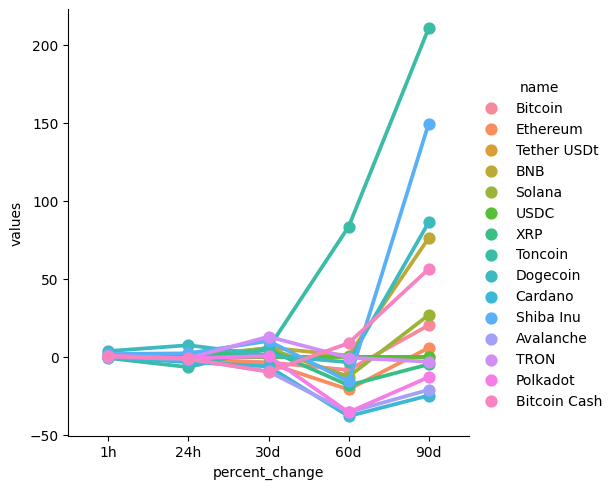

In [83]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [87]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
#df8 = df8.query("name == 'Bitcoin'") #filter out the specific data you want
df8

,name,quote.USD.price,timestamp
0,Bitcoin,61934.78197,2024-05-14 12:12:57.734382
1,Ethereum,2913.83462,2024-05-14 12:12:57.734382
2,Tether USDt,0.99933,2024-05-14 12:12:57.734382
3,BNB,586.61643,2024-05-14 12:12:57.734382
4,Solana,147.19630,2024-05-14 12:12:57.734382
5,USDC,0.99999,2024-05-14 12:12:57.734382
6,XRP,0.50675,2024-05-14 12:12:57.734382
7,Toncoin,6.86288,2024-05-14 12:12:57.734382
8,Dogecoin,0.15436,2024-05-14 12:12:57.734382
9,Cardano,0.43342,2024-05-14 12:12:57.734382


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

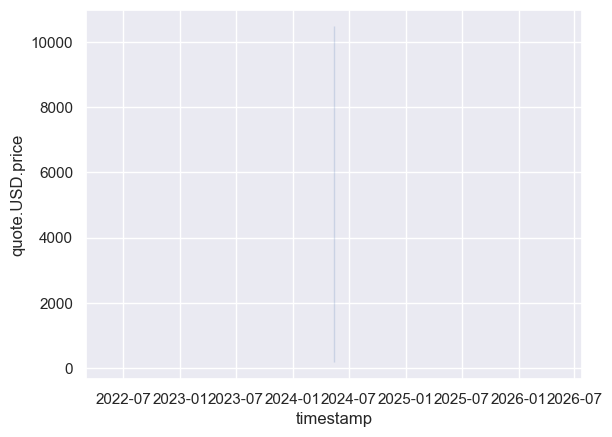

In [90]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)